# Used Car Price Prediction

### Load Dataset

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [52]:
cars_df = pd.read_csv( "https://drive.google.com/uc?export=download&id=1FFxZhi8p_cZM2bbSJRvnb3sev6dRCbsb" )

In [53]:
cars_df.sample(5)

,index,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats,Price,age,KM_Driven,make,mileage_new,engine_new,power_new
407,847,Ford Figo Diesel ZXI,Hyderabad,2013,Diesel,Manual,First,5.0,3.20,6,51,ford,20.00,1399,68.05
1895,3710,Ford Fiesta 1.4 TDCi EXI,Bangalore,2011,Diesel,Manual,First,5.0,3.20,8,85,ford,17.80,1399,68.00
686,1382,Maruti Wagon R LXI Minor,Pune,2009,Petrol,Manual,First,5.0,1.69,10,120,maruti,18.90,998,67.10
2561,5008,Hyundai Grand i10 CRDi SportZ Edition,Delhi,2014,Diesel,Manual,First,5.0,3.25,5,58,hyundai,24.00,1120,70.00
1455,2869,Volkswagen CrossPolo 1.5 TDI,Hyderabad,2014,Diesel,Manual,First,5.0,5.70,5,75,volkswagen,20.14,1498,88.50


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         3092 non-null   int64  
 1   Name          3092 non-null   object 
 2   Location      3092 non-null   object 
 3   Year          3092 non-null   int64  
 4   Fuel_Type     3092 non-null   object 
 5   Transmission  3092 non-null   object 
 6   Owner_Type    3092 non-null   object 
 7   Seats         3091 non-null   float64
 8   Price         3092 non-null   float64
 9   age           3092 non-null   int64  
 10  KM_Driven     3092 non-null   int64  
 11  make          3092 non-null   object 
 12  mileage_new   3092 non-null   float64
 13  engine_new    3092 non-null   int64  
 14  power_new     3092 non-null   float64
dtypes: float64(4), int64(5), object(6)
memory usage: 362.5+ KB


In [6]:
pd.DataFrame(cars_df.dtypes)

,0
index,int64
Name,object
Location,object
Year,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Seats,float64
Price,float64
age,int64


### Feature Set Selection

In [7]:
features = list(cars_df.columns)

In [8]:
x_features = ['KM_Driven', 'Fuel_Type', 'age',
              'Transmission', 'Owner_Type', 'Seats', 
              'make', 'mileage_new', 'engine_new', 
              'power_new', 'Location']

In [9]:
cat_features = ['Fuel_Type', 
                'Transmission', 'Owner_Type',
                'make', 'Location']

In [10]:
num_features = list(set(x_features) - set(cat_features))

In [11]:
num_features

['KM_Driven', 'engine_new', 'mileage_new', 'age', 'Seats', 'power_new']

In [12]:
cars_df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KM_Driven     3092 non-null   int64  
 1   Fuel_Type     3092 non-null   object 
 2   age           3092 non-null   int64  
 3   Transmission  3092 non-null   object 
 4   Owner_Type    3092 non-null   object 
 5   Seats         3091 non-null   float64
 6   make          3092 non-null   object 
 7   mileage_new   3092 non-null   float64
 8   engine_new    3092 non-null   int64  
 9   power_new     3092 non-null   float64
 10  Location      3092 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 265.8+ KB


### Dropping Null Values

In [13]:
cars_df = cars_df[x_features + ['Price']].dropna()

In [14]:
cars_df.shape

(3091, 12)

In [15]:
cars_df.sample(5)

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location,Price
2271,75,Diesel,5,Manual,First,5.0,tata,19.10,1405,70.00,Mumbai,3.30
381,23,Petrol,3,Manual,First,5.0,honda,18.70,1199,88.70,Chennai,6.50
1503,41,Petrol,3,Manual,First,5.0,nissan,19.69,1198,67.04,Ahmedabad,4.25
536,120,Petrol,4,Manual,First,5.0,chevrolet,18.60,1199,76.80,Kolkata,2.50
1189,50,Diesel,2,Manual,Second,7.0,honda,24.20,1498,98.60,Coimbatore,6.68


### Setting X and y variables

In [16]:
X = cars_df[x_features]
y = cars_df['Price']

### Data Splitting

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 80)

In [19]:
X_train

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location
1458,81,Diesel,5,Manual,First,5.0,volkswagen,20.14,1498,88.80,Hyderabad
3079,70,Petrol,9,Manual,Second,5.0,volkswagen,17.24,1198,73.90,Pune
2276,75,Petrol,4,Manual,First,5.0,hyundai,20.36,1197,78.90,Mumbai
1599,95,Petrol,21,Manual,Third,5.0,maruti,17.30,993,60.00,Jaipur
2356,14,Petrol,2,Manual,First,5.0,hyundai,18.60,1197,81.83,Kochi
...,...,...,...,...,...,...,...,...,...,...,...
522,45,Diesel,5,Manual,First,5.0,maruti,23.40,1248,74.00,Kolkata
2260,16,Petrol,2,Manual,First,5.0,tata,23.84,1199,84.00,Hyderabad
2983,21,Petrol,4,Manual,First,5.0,hyundai,18.90,1197,82.00,Pune
1213,83,Petrol,12,Manual,First,5.0,maruti,14.00,1061,64.00,Pune


In [20]:
X_train[0:10]

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location
1458,81,Diesel,5,Manual,First,5.0,volkswagen,20.14,1498,88.80,Hyderabad
3079,70,Petrol,9,Manual,Second,5.0,volkswagen,17.24,1198,73.90,Pune
2276,75,Petrol,4,Manual,First,5.0,hyundai,20.36,1197,78.90,Mumbai
1599,95,Petrol,21,Manual,Third,5.0,maruti,17.30,993,60.00,Jaipur
2356,14,Petrol,2,Manual,First,5.0,hyundai,18.60,1197,81.83,Kochi
737,12,Petrol,3,Manual,First,5.0,maruti,21.40,1197,83.10,Mumbai
265,50,Diesel,4,Manual,First,5.0,volkswagen,20.14,1498,88.80,Hyderabad
713,59,Petrol,12,Manual,First,4.0,maruti,16.10,796,37.00,Jaipur
82,88,Diesel,7,Manual,First,5.0,chevrolet,25.44,936,57.60,Jaipur
2918,27,Petrol,2,Manual,First,5.0,maruti,22.74,796,47.30,Kochi


In [21]:
X_test.shape

(619, 11)

### Encode Categorical Variables

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
ohe_encoder = OneHotEncoder(handle_unknown='ignore')

In [24]:
ohe_encoder.fit(X_train[cat_features])

OneHotEncoder(handle_unknown='ignore')

In [25]:
ohe_encoder.categories_

[array(['Diesel', 'Petrol'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['First', 'Fourth & Above', 'Second', 'Third'], dtype=object),
 array(['chevrolet', 'datsun', 'fiat', 'ford', 'honda', 'hyundai',
        'mahindra', 'maruti', 'mitsubishi', 'nissan', 'renault', 'skoda',
        'tata', 'toyota', 'volkswagen'], dtype=object),
 array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
        'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
       dtype=object)]

In [26]:
encoded_cat_names = list(ohe_encoder.get_feature_names(cat_features))
encoded_cat_names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Transmission_Automatic',
 'Transmission_Manual',
 'Owner_Type_First',
 'Owner_Type_Fourth & Above',
 'Owner_Type_Second',
 'Owner_Type_Third',
 'make_chevrolet',
 'make_datsun',
 'make_fiat',
 'make_ford',
 'make_honda',
 'make_hyundai',
 'make_mahindra',
 'make_maruti',
 'make_mitsubishi',
 'make_nissan',
 'make_renault',
 'make_skoda',
 'make_tata',
 'make_toyota',
 'make_volkswagen',
 'Location_Ahmedabad',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune']

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [28]:
preprocessor = ColumnTransformer(
    transformers=[        
        ('cat', ohe_encoder, cat_features)],
remainder='passthrough')

### Linear Models

Assumes linear relationship between features and outcome variable.

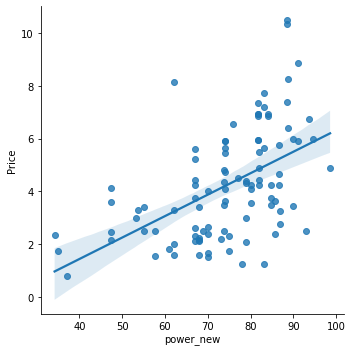

In [29]:
sn.lmplot( data = cars_df.sample(100),
           x = 'power_new',
           y = 'Price');

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lreg_v1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', LinearRegression())])

In [32]:
lreg_v1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Fuel_Type', 'Transmission',
                                                   'Owner_Type', 'make',
                                                   'Location'])])),
                ('regressor', LinearRegression())])

In [33]:
final_feature_names = lreg_v1['preprocessor'].get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
final_feature_names

['cat__x0_Diesel',
 'cat__x0_Petrol',
 'cat__x1_Automatic',
 'cat__x1_Manual',
 'cat__x2_First',
 'cat__x2_Fourth & Above',
 'cat__x2_Second',
 'cat__x2_Third',
 'cat__x3_chevrolet',
 'cat__x3_datsun',
 'cat__x3_fiat',
 'cat__x3_ford',
 'cat__x3_honda',
 'cat__x3_hyundai',
 'cat__x3_mahindra',
 'cat__x3_maruti',
 'cat__x3_mitsubishi',
 'cat__x3_nissan',
 'cat__x3_renault',
 'cat__x3_skoda',
 'cat__x3_tata',
 'cat__x3_toyota',
 'cat__x3_volkswagen',
 'cat__x4_Ahmedabad',
 'cat__x4_Bangalore',
 'cat__x4_Chennai',
 'cat__x4_Coimbatore',
 'cat__x4_Delhi',
 'cat__x4_Hyderabad',
 'cat__x4_Jaipur',
 'cat__x4_Kochi',
 'cat__x4_Kolkata',
 'cat__x4_Mumbai',
 'cat__x4_Pune',
 'KM_Driven',
 'age',
 'Seats',
 'mileage_new',
 'engine_new',
 'power_new']

### Understanding model parameters

In [35]:
lreg_v1['regressor'].intercept_

1.1401420555276136

In [36]:
lreg_v1['regressor'].coef_

array([ 4.98688190e-01, -4.98688190e-01,  1.24627161e-01, -1.24627161e-01,
        1.49318988e-01, -4.90114061e-01, -7.77504232e-03,  3.48570115e-01,
       -6.83143502e-01, -8.76919847e-01, -6.39617940e-01, -2.19120347e-02,
       -5.49070755e-03,  2.08279675e-01, -6.69617929e-01,  7.21181490e-01,
        1.34235493e+00, -5.32513444e-02,  1.53682094e-01,  7.16399904e-02,
       -8.21719401e-01,  1.09746304e+00,  1.77071485e-01, -6.66843929e-02,
        4.18189623e-01,  9.05320190e-02,  8.41383561e-01, -4.90271899e-01,
        4.45717586e-01, -8.96474779e-02,  2.67309548e-01, -1.07632530e+00,
       -2.44021401e-01, -9.61818643e-02, -1.07838943e-02, -3.37985779e-01,
        1.78722268e-01, -2.58392528e-02,  1.10238869e-03,  4.87353179e-02])

In [37]:
dict(zip(final_feature_names, np.round(lreg_v1['regressor'].coef_, 2)))

{'KM_Driven': -0.01,
 'Seats': 0.18,
 'age': -0.34,
 'cat__x0_Diesel': 0.5,
 'cat__x0_Petrol': -0.5,
 'cat__x1_Automatic': 0.12,
 'cat__x1_Manual': -0.12,
 'cat__x2_First': 0.15,
 'cat__x2_Fourth & Above': -0.49,
 'cat__x2_Second': -0.01,
 'cat__x2_Third': 0.35,
 'cat__x3_chevrolet': -0.68,
 'cat__x3_datsun': -0.88,
 'cat__x3_fiat': -0.64,
 'cat__x3_ford': -0.02,
 'cat__x3_honda': -0.01,
 'cat__x3_hyundai': 0.21,
 'cat__x3_mahindra': -0.67,
 'cat__x3_maruti': 0.72,
 'cat__x3_mitsubishi': 1.34,
 'cat__x3_nissan': -0.05,
 'cat__x3_renault': 0.15,
 'cat__x3_skoda': 0.07,
 'cat__x3_tata': -0.82,
 'cat__x3_toyota': 1.1,
 'cat__x3_volkswagen': 0.18,
 'cat__x4_Ahmedabad': -0.07,
 'cat__x4_Bangalore': 0.42,
 'cat__x4_Chennai': 0.09,
 'cat__x4_Coimbatore': 0.84,
 'cat__x4_Delhi': -0.49,
 'cat__x4_Hyderabad': 0.45,
 'cat__x4_Jaipur': -0.09,
 'cat__x4_Kochi': 0.27,
 'cat__x4_Kolkata': -1.08,
 'cat__x4_Mumbai': -0.24,
 'cat__x4_Pune': -0.1,
 'engine_new': 0.0,
 'mileage_new': -0.03,
 'power_new': 

### Predict on test set

In [38]:
y_pred = lreg_v1.predict(X_test)

In [39]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})

In [40]:
y_df.sample(10, random_state = 100)

,actual,predicted,residual
770,7.23,6.140619,-1.089381
1540,6.43,5.415039,-1.014961
2962,6.25,5.942801,-0.307199
2040,4.69,5.412764,0.722764
640,2.65,2.718549,0.068549
81,8.35,6.461743,-1.888257
2773,6.75,5.823360,-0.926640
816,3.00,4.077798,1.077798
305,1.96,1.310980,-0.649020
2907,4.00,4.425299,0.425299


### Measuring Accuracy

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
mse_v1 = mean_squared_error(y_test, y_pred)

In [43]:
mse_v1

0.9756488695977443

In [44]:
rmse_v1 = np.sqrt(mse_v1)

In [45]:
rmse_v1

0.9877493961515463

In [46]:
r2_score(y_test, y_pred)

0.7855630825732653

### What are the reasons for the remaining error

1. More factors 
2. More samples 
3. Complex Models : Try other models
4. Feature Engineering - Derive new features (factors) from existing features (factors)
5. Noise (randomness)
   

### Error Analysis

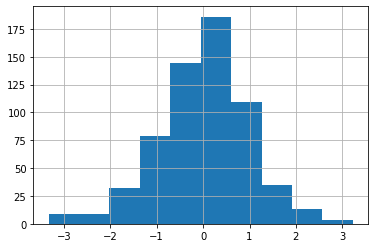

In [47]:
y_df.residual.hist();

In [48]:
y_df

,actual,predicted,residual
1324,5.91,5.821262,-0.088738
328,3.95,5.778714,1.828714
1361,10.34,8.235092,-2.104908
1657,1.20,1.679362,0.479362
1786,1.55,1.881246,0.331246
...,...,...,...
112,2.65,1.985685,-0.664315
2893,5.65,5.972072,0.322072
2093,2.25,2.660128,0.410128
2038,6.10,7.260181,1.160181


In [49]:
test_cars_df = y_df.join(X_test)

In [50]:
test_cars_df.sample(5)

,actual,predicted,residual,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location
487,4.30,4.793758,0.493758,55,Petrol,6,Manual,Second,5.0,nissan,16.95,1498,97.7,Chennai
773,2.96,2.069114,-0.890886,59,Petrol,9,Manual,First,5.0,maruti,19.70,796,46.3,Coimbatore
2327,1.35,1.346350,-0.003650,60,Petrol,9,Manual,First,5.0,maruti,19.00,998,66.1,Kolkata
1149,2.20,3.557958,1.357958,90,Petrol,6,Manual,First,5.0,maruti,20.92,998,67.1,Hyderabad
2449,6.50,6.057963,-0.442037,90,Diesel,4,Manual,First,5.0,maruti,26.21,1248,88.5,Chennai


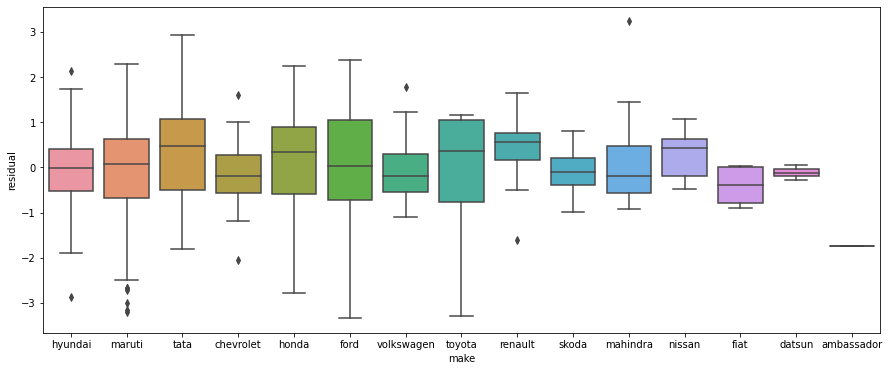

In [ ]:
plt.figure(figsize=(15, 6))
sn.boxplot(data = test_cars_df, x = 'make', y = 'residual');

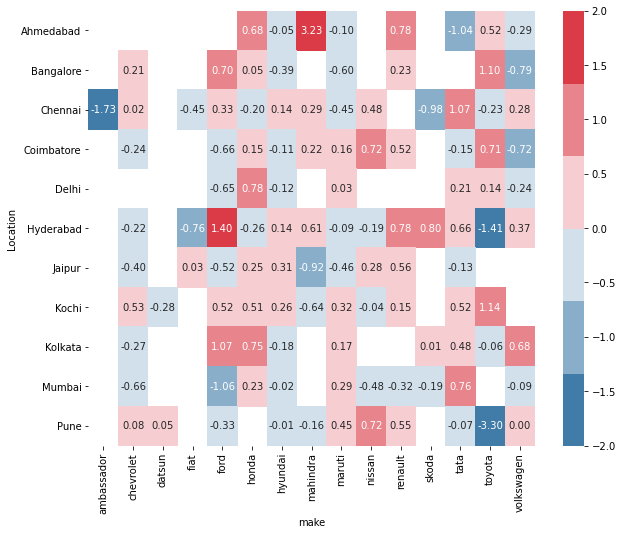

In [ ]:
make_mean = pd.crosstab(test_cars_df.Location,
                        test_cars_df.make,
                        values = test_cars_df.residual,
                        aggfunc = 'median')

plt.figure(figsize=(10, 8))
sn.heatmap(make_mean, 
           annot=True, 
           cmap=sn.diverging_palette(240, 10),
           vmax = 2.0,
           vmin = -2.0,
           fmt='1.2f');

### Saving the model

In [ ]:
class CarPredictionModel():
    
    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse

In [ ]:
my_model = CarPredictionModel(lreg_v1, list(X_train.columns), rmse_v1)

In [ ]:
# Uncomment this code for older version of sklearn
#from sklearn.externals import joblib
#joblib.dump(my_model, './cars.pkl')

In [ ]:
from joblib import dump

In [ ]:
dump(my_model, './cars.pkl')

['./cars.pkl']